In [2]:
# world_points = torch.tensor([[
#     [ 5. , -5. ,  0. ], [ 0. ,  0. ,  1.5],
#     [ 2.5,  3. ,  6. ], [ 9. , -2. ,  3. ],
#     [-4. ,  5. ,  2. ], [-5. ,  5. ,  1. ],
# ]], dtype=torch.float64)

# img_points = torch.tensor([[
#     [1409.1504, -800.936 ], [ 407.0207, -182.1229],
#     [ 392.7021,  177.9428], [1016.838 ,   -2.9416],
#     [ -63.1116,  142.9204], [-219.3874,   99.666 ],
# ]], dtype=torch.float64)

# intrinsics = torch.tensor([[
#     [ 500.,    0.,  250.],
#     [   0.,  500.,  250.],
#     [   0.,    0.,    1.],
# ]], dtype=torch.float64)

# print(world_points.shape, img_points.shape, intrinsics.shape)


# pred_world_to_cam = K.geometry.solve_pnp_dlt(world_points, img_points, intrinsics)

# print(pred_world_to_cam.shape)


# pred_world_to_cam
# # tensor([[[ 0.9392, -0.3432, -0.0130,  1.6734],
# #          [ 0.3390,  0.9324, -0.1254, -4.3634],
# #          [ 0.0552,  0.1134,  0.9920,  3.7785]]], dtype=torch.float64)

In [3]:
import kornia as K
from courtvision.vis import plot_coords
from courtvision.geometry import PadelCourt

/Users/benjamindecharmoy/projects/courtvision/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
# from dataclasses import dataclass
# import numpy as np
# court_scale=40

# @dataclass
# class PadelCourt:
#     # REF: https://www.lta.org.uk/4ad2a4/siteassets/play/padel/file/lta-padel-court-guidance.pdf
#     width: float = 10.0*court_scale
#     length: float = 20.0*court_scale
#     serve_line_from_back_line: float = 2.0*court_scale
#     line_width:float = 0.05

#     @classmethod
#     @property
#     def center_line(cls)->np.array:
#         return np.array([
#             (cls.width/2, cls.length),
#             (cls.width/2, 0)
#         ],dtype=np.int32).reshape(-1,1,2)
#     @classmethod
#     @property
#     def net_line(cls)->np.array:
#         return np.array([
#             (0, cls.length/2),
#             (cls.width, cls.length/2)
#             ], dtype=np.int64
#         ).reshape(-1, 1,2)
#     @classmethod
#     @property
#     def near_serve_line(cls):
#         return np.array([
#             (0, cls.length-cls.serve_line_from_back_line),
#             (cls.width, cls.length-cls.serve_line_from_back_line)

#         ], np.int32).reshape(-1, 1, 2)

#     @classmethod
#     @property
#     def far_serve_line(cls):
#         return np.array([
#             (0, cls.serve_line_from_back_line),
#             (cls.width, cls.serve_line_from_back_line)
#         ], dtype=np.int32).reshape(-1,1,2)

#     @classmethod
#     @property
#     def front_left(cls):
#         return (0.0, cls.length)

#     @classmethod
#     @property
#     def front_right(cls):
#         return (cls.width, cls.length)

#     @classmethod
#     @property
#     def back_left(cls):
#         return (0.0, 0.0)

#     @classmethod
#     @property
#     def back_right(cls):
#         return ( cls.width,0.0)

#     @classmethod
#     @property
#     def left_near_serve_line(cls):
#         return (0.0, cls.length-cls.serve_line_from_back_line)


#     @classmethod
#     @property
#     def right_near_serve_line(cls):
#         return (cls.width, cls.length-cls.serve_line_from_back_line)

#     @classmethod
#     @property
#     def left_far_serve_line(cls):
#         return (0.0, cls.serve_line_from_back_line)

#     @classmethod
#     @property
#     def right_far_serve_line(cls):
#         return (cls.width, cls.serve_line_from_back_line)

#     # Normalised:
#     @classmethod
#     @property
#     def front_left_n(cls):
#         return (0.0, cls.length/cls.length)

#     @classmethod
#     @property
#     def front_right_n(cls):
#         return (cls.width/cls.width, cls.length/cls.length)

#     @classmethod
#     @property
#     def back_left_n(cls):
#         return (0.0, 0.0)

#     @classmethod
#     @property
#     def back_right_n(cls):
#         return ( cls.width/cls.width,0.0)

#     @classmethod
#     @property
#     def left_near_serve_line_n(cls):
#         return (0.0, (cls.length-cls.serve_line_from_back_line)/cls.length)


#     @classmethod
#     @property
#     def right_near_serve_line_n(cls):
#         return (cls.width/cls.width, (cls.length-cls.serve_line_from_back_line)/cls.length)

#     @classmethod
#     @property
#     def left_far_serve_line_n(cls):
#         return (0.0, (cls.serve_line_from_back_line)/cls.length)

#     @classmethod
#     @property
#     def right_far_serve_line_n(cls):
#         return (cls.width/cls.width, cls.serve_line_from_back_line/cls.length)

In [5]:
corners_world = {
    "front_left": PadelCourt.front_left,
    "front_right": PadelCourt.front_right,
    "back_left": PadelCourt.back_left,
    "back_right": PadelCourt.back_right,
    "left_near_serve_line": PadelCourt.left_near_serve_line,
    "right_near_serve_line": PadelCourt.right_near_serve_line,
    "left_far_serve_line": PadelCourt.left_far_serve_line,
    "right_far_serve_line": PadelCourt.right_far_serve_line,
}
corners_world_3d = {
    "front_left": (*PadelCourt.front_left, 0.0),
    "front_right": (*PadelCourt.front_right, 0.0),
    "back_left": (*PadelCourt.back_left, 0.0),
    "back_right": (*PadelCourt.back_right, 0.0),
    "left_near_serve_line": (*PadelCourt.left_near_serve_line, 0.0),
    "right_near_serve_line": (*PadelCourt.right_near_serve_line, 0.0),
    "left_far_serve_line": (*PadelCourt.left_far_serve_line, 0.0),
    "right_far_serve_line": (*PadelCourt.right_far_serve_line, 0.0),
}
corners_world_n = {
    "front_left": PadelCourt.front_left_n,
    "front_right": PadelCourt.front_right_n,
    "back_left": PadelCourt.back_left_n,
    "back_right": PadelCourt.back_right_n,
    "left_near_serve_line": PadelCourt.left_near_serve_line_n,
    "right_near_serve_line": PadelCourt.right_near_serve_line_n,
    "left_far_serve_line": PadelCourt.left_far_serve_line_n,
    "right_far_serve_line": PadelCourt.right_far_serve_line_n,
}
corners_world_3d_n = {
    "front_left": (*PadelCourt.front_left_n, 0.0),
    "front_right": (*PadelCourt.front_right_n, 0.0),
    "back_left": (*PadelCourt.back_left_n, 0.0),
    "back_right": (*PadelCourt.back_right_n, 0.0),
    "left_near_serve_line": (*PadelCourt.left_near_serve_line_n, 0.0),
    "right_near_serve_line": (*PadelCourt.right_near_serve_line_n, 0.0),
    "left_far_serve_line": (*PadelCourt.left_far_serve_line_n, 0.0),
    "right_far_serve_line": (*PadelCourt.right_far_serve_line_n, 0.0),
}
corners_world_3d

{'front_left': (0.0, 0.0, 0.0),
 'front_right': (10.0, 0, 0.0),
 'back_left': (0.0, 20.0, 0.0),
 'back_right': (10.0, 20.0, 0.0),
 'left_near_serve_line': (0.0, 2.0, 0.0),
 'right_near_serve_line': (10.0, 2.0, 0.0),
 'left_far_serve_line': (0.0, 18.0, 0.0),
 'right_far_serve_line': (10.0, 18.0, 0.0)}

In [6]:
from matplotlib import pyplot as plt

corners_image = {
    "front_left": ((11.11111111111111 / 100.0), (87.90123456790124 / 100.0)),
    "front_right": ((89.44444444444444 / 100.0), (88.64197530864197 / 100.0)),
    "back_left": ((31.38888888888889 / 100.0), (29.135802469135804 / 100.0)),
    "back_right": ((69.16666666666667 / 100.0), (29.382716049382715 / 100.0)),
    "left_near_serve_line": ((16.61237785016286 / 100.0), (72.58687258687259 / 100.0)),
    "right_near_serve_line": ((84.14766558089035 / 100.0), (72.77992277992279 / 100.0)),
    "left_far_serve_line": ((29.641693811074916 / 100.0), (34.36293436293436 / 100.0)),
    "right_far_serve_line": ((70.96774193548387 / 100.0), (34.387351778656125 / 100.0)),
}

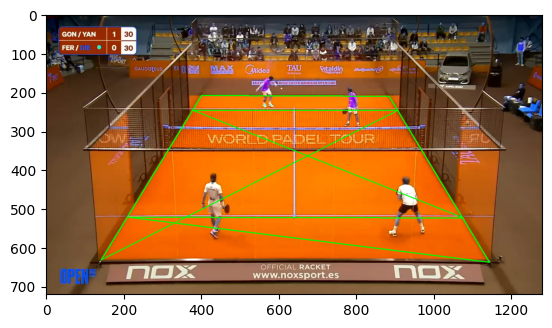

In [7]:
import cv2
import numpy as np

# Load the input image
img = cv2.imread(
    "/Users/benjamindecharmoy/projects/courtvision/data/frames/curated_001/frame_0001.png"
)
height, width, _ = img.shape
# Define the source and destination coordinates
src_coords = np.array(
    [
        (
            corners_image["front_left"][0] * width,
            corners_image["front_left"][1] * height,
        ),
        (corners_image["back_left"][0] * width, corners_image["back_left"][1] * height),
        (
            corners_image["back_right"][0] * width,
            corners_image["back_right"][1] * height,
        ),
        (
            corners_image["front_right"][0] * width,
            corners_image["front_right"][1] * height,
        ),
        (
            corners_image["left_near_serve_line"][0] * width,
            corners_image["left_near_serve_line"][1] * height,
        ),
        (
            corners_image["right_near_serve_line"][0] * width,
            corners_image["right_near_serve_line"][1] * height,
        ),
        (
            corners_image["left_far_serve_line"][0] * width,
            corners_image["left_far_serve_line"][1] * height,
        ),
        (
            corners_image["right_far_serve_line"][0] * width,
            corners_image["right_far_serve_line"][1] * height,
        ),
    ],
    dtype=np.float32,
)
src_coords_norm = np.array(
    [
        (corners_image["front_left"][0], corners_image["front_left"][1]),
        (corners_image["back_left"][0], corners_image["back_left"][1]),
        (corners_image["back_right"][0], corners_image["back_right"][1]),
        (corners_image["front_right"][0], corners_image["front_right"][1]),
        (
            corners_image["left_near_serve_line"][0],
            corners_image["left_near_serve_line"][1],
        ),
        (
            corners_image["right_near_serve_line"][0],
            corners_image["right_near_serve_line"][1],
        ),
        (
            corners_image["left_far_serve_line"][0],
            corners_image["left_far_serve_line"][1],
        ),
        (
            corners_image["right_far_serve_line"][0],
            corners_image["right_far_serve_line"][1],
        ),
    ],
    dtype=np.float32,
)
dst_coords = np.array(
    [
        corners_world["front_left"],
        corners_world["back_left"],
        corners_world["back_right"],
        corners_world["front_right"],
        corners_world["left_near_serve_line"],
        corners_world["right_near_serve_line"],
        corners_world["left_far_serve_line"],
        corners_world["right_far_serve_line"],
    ],
    dtype=np.float32,
)

dst_coords_norm = np.array(
    [
        corners_world_n["front_left"],
        corners_world_n["back_left"],
        corners_world_n["back_right"],
        corners_world_n["front_right"],
        corners_world_n["left_near_serve_line"],
        corners_world_n["right_near_serve_line"],
        corners_world_n["left_far_serve_line"],
        corners_world_n["right_far_serve_line"],
    ],
    dtype=np.float32,
)
dst_coords, dst_coords_norm
plot_coords(img=img, src_coords=src_coords)

In [8]:
corners_image

{'front_left': (0.1111111111111111, 0.8790123456790124),
 'front_right': (0.8944444444444444, 0.8864197530864197),
 'back_left': (0.3138888888888889, 0.291358024691358),
 'back_right': (0.6916666666666668, 0.2938271604938272),
 'left_near_serve_line': (0.16612377850162863, 0.7258687258687259),
 'right_near_serve_line': (0.8414766558089035, 0.7277992277992279),
 'left_far_serve_line': (0.29641693811074915, 0.3436293436293436),
 'right_far_serve_line': (0.7096774193548387, 0.3438735177865613)}

Intrinsic matrix:
 [[1.00994393e+04 0.00000000e+00 3.59513423e+02]
 [0.00000000e+00 6.40163985e+02 6.39625019e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
Distortion coefficients:
 [[-1.13692194  0.54870319 -0.2297856  -0.00819013 -0.10145845]]


array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

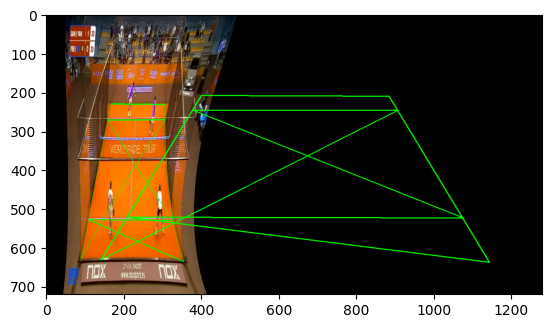

In [9]:
import cv2
import numpy as np

# Define object points in 3D space
# object_points = np.array([[0, 0, 0], [1, 0, 0], [1, 1, 0], [0, 1, 0]], dtype=np.float32)
dst_coords_3d = np.array(
    [
        corners_world_3d["front_left"],
        corners_world_3d["back_left"],
        corners_world_3d["back_right"],
        corners_world_3d["front_right"],
        corners_world_3d["left_near_serve_line"],
        corners_world_3d["right_near_serve_line"],
        corners_world_3d["left_far_serve_line"],
        corners_world_3d["right_far_serve_line"],
    ],
    dtype=np.float32,
)

src_coords
# Load images and detect corners
# image_points = []
# for i in range(num_images):
#     image = cv2.imread(f'image_{i}.jpg')
#     gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#     ret, corners = cv2.findChessboardCorners(gray, (7,7), None)
#     if ret:
#         image_points.append(corners)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Compute intrinsic matrix and distortion coefficients
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(
    [dst_coords_3d], [src_coords_norm], img.shape[:2], None, None
)

# Print intrinsic matrix and distortion coefficients
print("Intrinsic matrix:\n", mtx)
print("Distortion coefficients:\n", dist)

import cv2
import numpy as np


def undistort_image(image, intrinsic_matrix, distortion_coeffs):
    # Compute optimal camera matrix
    width, height = image.shape[:2]
    new_camera_matrix, roi = cv2.getOptimalNewCameraMatrix(
        intrinsic_matrix, distortion_coeffs, (width, height), 1, (width, height)
    )

    # Undistort image
    undistorted_image = cv2.undistort(
        image, intrinsic_matrix, distortion_coeffs, None, new_camera_matrix
    )

    # Crop image to remove black border
    x, y, w, h = roi
    # undistorted_image = undistorted_image[y:y+h, x:x+w]

    return undistorted_image


und_img = undistort_image(image=img, intrinsic_matrix=mtx, distortion_coeffs=dist)
plot_coords(img=und_img, src_coords=src_coords)
und_img

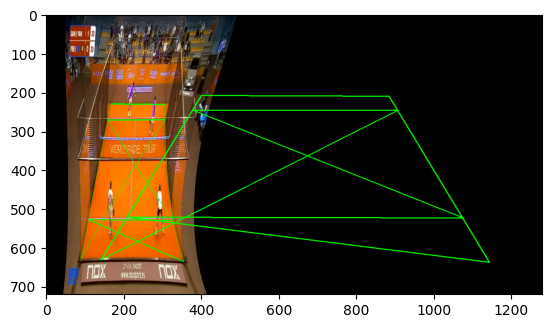

In [10]:
und_img = undistort_image(image=img, intrinsic_matrix=mtx, distortion_coeffs=dist)
plot_coords(img=und_img, src_coords=src_coords)

In [11]:
# compute perspective transform
import kornia as K
import torch

points_src_norm = torch.tensor(src_coords_norm)
points_dst_norm = torch.tensor(dst_coords_norm)
points_src = torch.tensor(src_coords)
points_dst = torch.tensor(dst_coords)

points_dst_norm.shape

torch.Size([8, 2])

In [12]:
# points_src/points_src.max()
t_img = K.utils.image_to_tensor(img).float().unsqueeze(0)
t_img.shape
# points_src.shape

torch.Size([1, 3, 720, 1280])

In [13]:
# M: torch.tensor = K.geometry.get_perspective_transform(points_src, points_dst)
from kornia.geometry.transform.imgwarp import homography_warp

m_homography = K.geometry.ransac.RANSAC()
H, d = m_homography(points_dst_norm, points_src_norm)
warped = homography_warp(
    patch_src=t_img,
    src_homo_dst=H.unsqueeze(0),
    dsize=(width, height),
    align_corners=True,
    normalized_coordinates=True,
    normalized_homography=True,
)
H, d

(tensor([[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]),
 tensor([[False],
         [False],
         [False],
         [False],
         [False],
         [False],
         [False],
         [False]]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


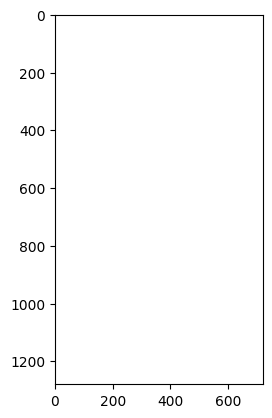

In [14]:
# warped = warper(t_img, H.unsqueeze(0))
plt.imshow(K.tensor_to_image(warped))

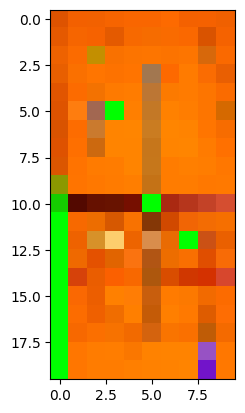

In [15]:
# # warp the original image by the found transform
# img_warp: torch.tensor = K.geometry.warp_perspective(img.float(), M, dsize=(h, w))

# Find the homography matrix
H, _ = cv2.findHomography(src_coords, dst_coords, method=cv2.RANSAC, maxIters=1000)

# Apply the homography matrix to the input image
output_size = (
    int(PadelCourt.width),
    int(PadelCourt.length),
)  # The size of the output image
output = cv2.warpPerspective(img, H, output_size)

# Display the output image
plt.imshow(output)
# cv2.imshow('Output', output)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

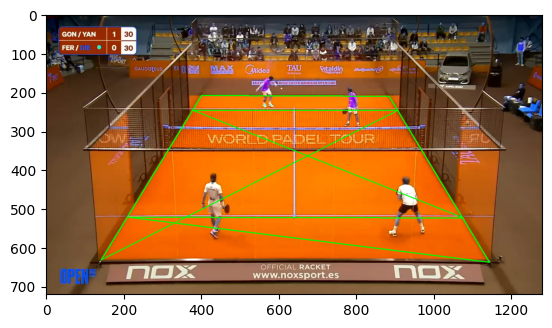

In [16]:
plt.imshow(img)

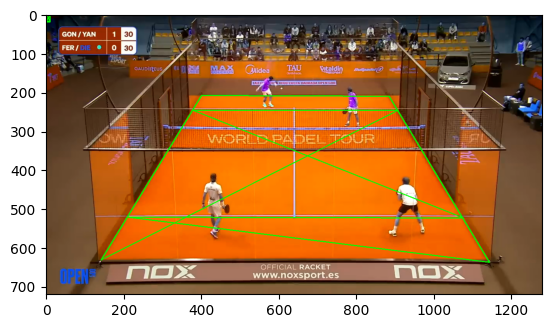

In [17]:
def plot_coords(img: np.array, src_coords: np.array, show: bool = True):
    src_coords = src_coords.astype(int)
    cv2.polylines(img, [src_coords], True, (0, 255, 0), thickness=2)
    plt.imshow(img)


plot_coords(img=img, src_coords=dst_coords)

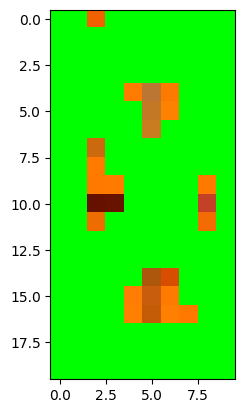

In [18]:
plot_coords(output, dst_coords)

In [15]:
PadelCourt.center_line.shape

(2, 1, 2)

In [16]:
cv2.polylines(output, [PadelCourt.center_line], True, (0, 255, 0), thickness=2)
cv2.polylines(output, [PadelCourt.net_line], True, (0, 255, 0), thickness=2)
cv2.polylines(output, [PadelCourt.near_serve_line], True, (0, 255, 0), thickness=2)
cv2.polylines(output, [PadelCourt.far_serve_line], True, (0, 255, 0), thickness=2)

array([[[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [186, 166, 217],
        ...,
        [209,  83,   0],
        [209,  82,   0],
        [  0, 255,   0]],

       ...,

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [203,  75,   0],
        [197,  71,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [191,  71,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]]

In [17]:
dst_coords

array([[  0., 800.],
       [  0.,   0.],
       [400.,   0.],
       [400., 800.],
       [  0., 720.],
       [400., 720.],
       [  0.,  80.],
       [400.,  80.]], dtype=float32)

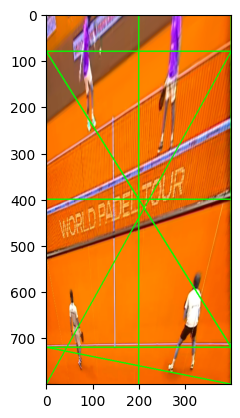

In [18]:
plt.imshow(output)

In [166]:
PadelCourt.far_serve_line

array([[[  0,   2]],

       [[400,   2]]], dtype=int32)

In [49]:
import cv2
import numpy as np

# Define the 2D and 3D coordinates
image_points = np.array([(10, 20), (100, 50), (30, 200)], dtype=np.float32)
world_points = np.array([(0, 0, 0), (1, 0, 0), (0, 1, 0)], dtype=np.float32)

# Compute the camera matrix
_, rvec, tvec = cv2.solvePnP(
    world_points, image_points, np.eye(3, dtype=np.float32), None
)
rot_mat, _ = cv2.Rodrigues(rvec)
cam_mat = np.hstack((rot_mat, tvec))

# Define the image to be placed on the plane
img = cv2.imread("image.jpg")

# Compute the perspective transformation
rows, cols, _ = img.shape
persp_mat = cv2.getPerspectiveTransform(
    np.array(
        [(0, 0), (cols - 1, 0), (0, rows - 1), (cols - 1, rows - 1)], dtype=np.float32
    ),
    cam_mat.dot(world_points.T).T[:, :2],
)

# Apply the perspective transformation and place the image on the plane
result = cv2.warpPerspective(img, persp_mat, (cols, rows))

error: OpenCV(4.7.0) /Users/xperience/GHA-OCV-Python/_work/opencv-python/opencv-python/opencv/modules/calib3d/src/solvepnp.cpp:840: error: (-215:Assertion failed) ( (npoints >= 4) || (npoints == 3 && flags == SOLVEPNP_ITERATIVE && useExtrinsicGuess) || (npoints >= 3 && flags == SOLVEPNP_SQPNP) ) && npoints == std::max(ipoints.checkVector(2, CV_32F), ipoints.checkVector(2, CV_64F)) in function 'solvePnPGeneric'
